Implementation of Tracking non-stationary Bandit problem 
what do we understand from the term non stationary bandit problem : it is different type of variant of a bandit problem where reward of each distribution changes over time it makes the probability distribution evolve because the strategies taken to achieve the reward wont be suitable 

In [4]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math 
import random 

as we know non stationary bandit problem can be also defined as the reward sequence changing over time 
when it comes to non stationary bandit problem an agent or an player must balance exploration and exploitation 
exploration  can be defined as an agent to improve its current knowledge about each action,Improving the accuracy of the estimated action-values, enables an agent to make more informed decisions in the future
where as exploitation refers to choosing the best reward out of all the eisting reward that are taken into conwsideration

In [33]:
#non stationary bandit problem using Epsilon Greedy 
class EpsilonGreedy:
    def __init__(self,n_arms,epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts=np.zeros(n_arms)
        self.rewards=np.zeros(n_arms)

    def arms(self):
        if np.random.rand() < self.epsilon:
            #explore
            return np.random.randint(0,self.n_arms)
        else:
            #exploit
            return np.argmax(self.rewards/self.counts + 1e-5)
        
    def update(self,chosen_arm,reward):
        self.counts[chosen_arm]+=1
        self.rewards[chosen_arm]+=reward

n_arms=4
epsilon = 0.1
bandit=EpsilonGreedy(n_arms,epsilon)

probabilities=np.random.uniform(0.3, 0.7, n_arms)
for i in range(1000):
        arm=bandit.arms()

        #introducing non stationarity
        if i%100==0:
            probabilities+=np.random.uniform(-0.1, 0.1, n_arms)
            probabilities=np.clip(probabilities,0,1)#keeping the prababilites within the range of 0,1
             
        reward=np.random.binomial(1,probabilities[arm])
        bandit.update(arm,reward)



print("counts of each arm pulled:",bandit.counts)
print("total reward for each arm pulled:",bandit.rewards)

#calculation of probability 
prob=bandit.rewards/(bandit.counts+ 1e-5)
print("Estimated reward probability for each arm:", prob)

counts of each arm pulled: [ 27. 383.  36. 554.]
total reward for each arm pulled: [  6. 250.   9. 306.]
Estimated reward probability for each arm: [0.22222214 0.6527415  0.24999993 0.55234656]


C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_16320\1422725729.py:15: RuntimeWarning: invalid value encountered in divide
  return np.argmax(self.rewards/self.counts + 1e-5)


Thompson Sampling is one of heuristic sampling technique in choosing actions adressing the exploration - exploitation dilemma in MAB here in this algorithm action are taken sequentially in manner in order to balance the exploiting which is basically to mazimize the immediate reward and new information exploration leading to future rewards thompson sampling is also known to be as Online Learning where it uses all of the training information ,evaluates those action based on the training information rather than giving instructs by giving correct action 

In [34]:
#thompson algorithm

        


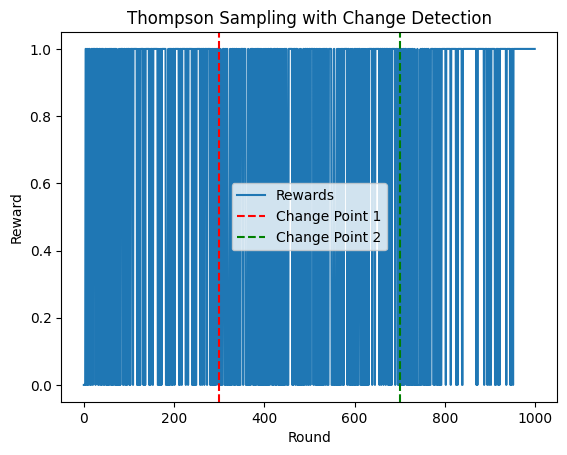